# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  >
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [ ]:
def random_tour(n):
    """Create a random tour"""

    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[6, 7, 5, 9, 0, 1, 3, 4, 2, 8]

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [ ]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

tour = random_tour(10)
tour_length(tsp, tour)

np.float64(5.144944008847177)

Tour length: 5.14


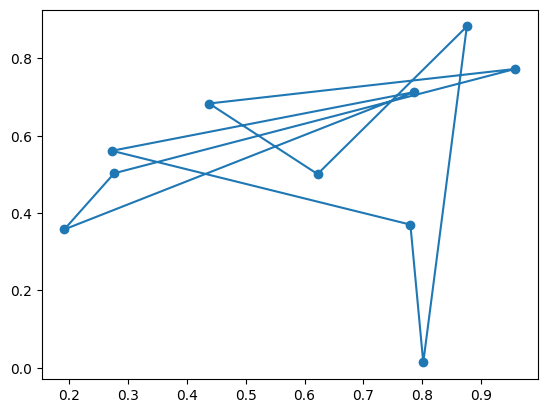

In [ ]:
def show_tsp(tsp, tour = None):
    """display the traveling salesman problem and a tour."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        # Assuming tour_length is defined elsewhere
        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        pos_ = pos.reindex(tour)
        # Corrected line: Use pd.concat() instead of the removed .append()
        pos_ = pd.concat([pos_, pos_.head(1)])
        plt.plot(pos_["x"], pos_["y"])

    plt.show()

show_tsp(tsp, tour)

In [ ]:
import random

def move_swap(tour):
    """Tạo ra một 'người hàng xóm' bằng cách hoán đổi vị trí của hai thành phố ngẫu nhiên trong tour."""
    n = len(tour)

    # Chọn ngẫu nhiên hai chỉ mục khác nhau
    i, j = random.sample(range(n), 2)

    # Tạo bản sao của tour và hoán đổi vị trí
    new_tour = tour.copy()
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]

    return new_tour

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [ ]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [ ]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.763574 


Tour length: 2.76


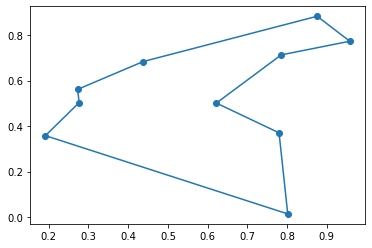

In [ ]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [ ]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr    min      lq     mean median       uq     max neval
 tsp <- TSP(d) 287.99 302.479 324.9209 312.62 336.2445 616.048   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

Initial tour length: 5.40
Step 0: Found better tour with length 4.52
Step 1: Found better tour with length 4.02
Step 2: Found better tour with length 3.41
Step 3: Found better tour with length 3.26
Step 4: Found better tour with length 3.15
Step 5: Found better tour with length 2.87
Step 6: Found better tour with length 2.79
Local optimum found at step 7 with length 2.79
Tour length: 2.79


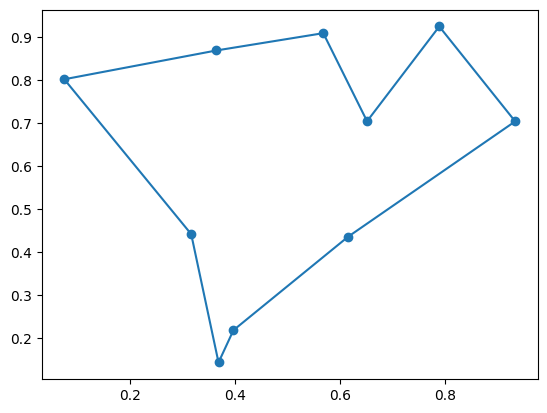

In [ ]:
# Code goes here
def get_all_neighbors(tour):
    """Tạo ra tất cả các hàng xóm bằng cách hoán đổi 2 thành phố."""
    neighbors = []
    n = len(tour)
    for i in range(n):
        for j in range(i + 1, n):
            neighbor = tour.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

def steepest_ascend_hill_climbing(tsp, initial_tour=None, max_steps=1000, verbose=True):
    if initial_tour is None:
        current_tour = random_tour(len(tsp['pos']))
    else:
        current_tour = initial_tour.copy()

    current_length = tour_length(tsp, current_tour)

    if verbose:
        print(f"Initial tour length: {current_length:.2f}")

    history = [current_length]

    for step in range(max_steps):
        neighbors = get_all_neighbors(current_tour)

        # Tìm hàng xóm tốt nhất
        best_neighbor = min(neighbors, key=lambda t: tour_length(tsp, t))
        best_neighbor_length = tour_length(tsp, best_neighbor)

        # Nếu hàng xóm tốt nhất tốt hơn trạng thái hiện tại, di chuyển đến đó
        if best_neighbor_length < current_length:
            current_tour = best_neighbor
            current_length = best_neighbor_length
            history.append(current_length)
            if verbose:
                print(f"Step {step}: Found better tour with length {current_length:.2f}")
        else:
            # Đạt đến tối ưu cục bộ
            if verbose:
                print(f"Local optimum found at step {step} with length {current_length:.2f}")
            break

    return current_tour, history

# Chạy thử thuật toán
tsp_10 = random_tsp(10)
initial_tour_10 = random_tour(10)
best_tour_hc, history_hc = steepest_ascend_hill_climbing(tsp_10, initial_tour_10)

show_tsp(tsp_10, best_tour_hc)

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

Restart 1/10: Found tour length 2.79
Restart 2/10: Found tour length 2.67
Restart 3/10: Found tour length 2.79
Restart 4/10: Found tour length 2.67
Restart 5/10: Found tour length 2.67
Restart 6/10: Found tour length 2.67
Restart 7/10: Found tour length 2.67
Restart 8/10: Found tour length 2.67
Restart 9/10: Found tour length 2.67
Restart 10/10: Found tour length 2.79

Best tour found after 10 restarts has length 2.67
Tour length: 2.67


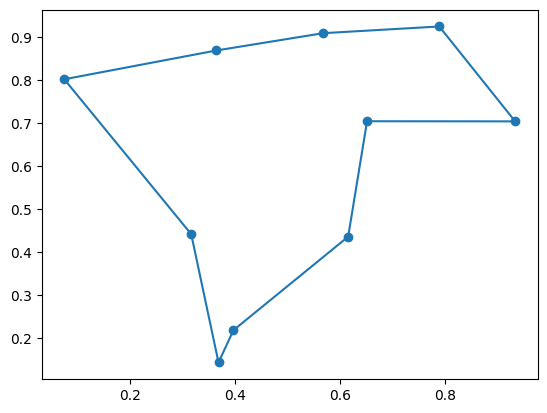

In [ ]:
# Code goes here
def random_restart_hill_climbing(tsp, k=10, max_steps=1000, verbose=False):
    best_overall_tour = None
    best_overall_length = float('inf')

    for i in range(k):
        # Mỗi lần chạy bắt đầu từ một tour ngẫu nhiên mới
        solution, _ = steepest_ascend_hill_climbing(tsp, max_steps=max_steps, verbose=False)
        solution_length = tour_length(tsp, solution)

        if verbose:
            print(f"Restart {i+1}/{k}: Found tour length {solution_length:.2f}")

        if solution_length < best_overall_length:
            best_overall_tour = solution
            best_overall_length = solution_length

    if verbose:
        print(f"\nBest tour found after {k} restarts has length {best_overall_length:.2f}")

    return best_overall_tour

# Chạy thử với 10 lần khởi động lại
best_tour_rr = random_restart_hill_climbing(tsp_10, k=10, verbose=True)
show_tsp(tsp_10, best_tour_rr)

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

Initial tour length: 5.40
Step 0: Found better tour with length 5.17
Step 1: Found better tour with length 4.65
Step 2: Found better tour with length 4.11
Step 3: Found better tour with length 3.70
Step 4: Found better tour with length 3.36
Step 5: Found better tour with length 3.34
Step 6: Found better tour with length 3.28
Step 7: Found better tour with length 2.99
Step 8: Found better tour with length 2.84
Step 9: Found better tour with length 2.79
Local optimum found at step 10 with length 2.79
Tour length: 2.79


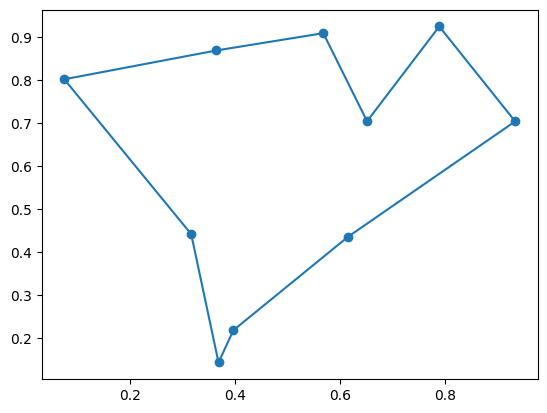

In [ ]:
# Code goes here
def stochastic_hill_climbing(tsp, initial_tour=None, max_steps=1000, verbose=True):
    if initial_tour is None:
        current_tour = random_tour(len(tsp['pos']))
    else:
        current_tour = initial_tour.copy()

    current_length = tour_length(tsp, current_tour)
    if verbose:
        print(f"Initial tour length: {current_length:.2f}")

    history = [current_length]

    for step in range(max_steps):
        # Tìm tất cả các hàng xóm tốt hơn
        uphill_moves = [
            t for t in get_all_neighbors(current_tour)
            if tour_length(tsp, t) < current_length
        ]

        if not uphill_moves:
            if verbose:
                print(f"Local optimum found at step {step} with length {current_length:.2f}")
            break

        # Chọn ngẫu nhiên một trong các bước đi tốt hơn
        current_tour = random.choice(uphill_moves)
        current_length = tour_length(tsp, current_tour)
        history.append(current_length)
        if verbose:
            print(f"Step {step}: Found better tour with length {current_length:.2f}")

    return current_tour, history

# Chạy thử
best_tour_shc, history_shc = stochastic_hill_climbing(tsp_10, initial_tour_10)
show_tsp(tsp_10, best_tour_shc)

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

Initial tour length: 5.40
Step 0: Found better tour with length 5.03
Step 1: Found better tour with length 4.42
Step 2: Found better tour with length 3.83
Step 3: Found better tour with length 3.30
Step 4: Found better tour with length 2.81
Step 5: Found better tour with length 2.79
Local optimum found at step 6 with length 2.79
Tour length: 2.79


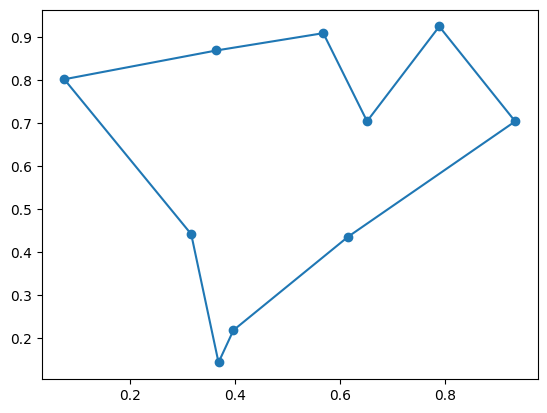

In [ ]:
# Code goes here
def first_choice_hill_climbing(tsp, initial_tour=None, max_steps=1000, max_local_tries=100, verbose=True):
    if initial_tour is None:
        current_tour = random_tour(len(tsp['pos']))
    else:
        current_tour = initial_tour.copy()

    current_length = tour_length(tsp, current_tour)
    if verbose:
        print(f"Initial tour length: {current_length:.2f}")

    history = [current_length]

    for step in range(max_steps):
        improved = False
        # Thử tạo ngẫu nhiên hàng xóm và chọn ngay cái đầu tiên tốt hơn
        for _ in range(max_local_tries):
            new_tour = move_swap(current_tour) # Dùng hoán đổi 2 thành phố ngẫu nhiên
            new_length = tour_length(tsp, new_tour)

            if new_length < current_length:
                current_tour = new_tour
                current_length = new_length
                history.append(current_length)
                if verbose:
                    print(f"Step {step}: Found better tour with length {current_length:.2f}")
                improved = True
                break # Đã tìm thấy, không cần thử thêm

        if not improved:
            if verbose:
                print(f"Local optimum found at step {step} with length {current_length:.2f}")
            break

    return current_tour, history

# Chạy thử
best_tour_fchc, history_fchc = first_choice_hill_climbing(tsp_10, initial_tour_10)
show_tsp(tsp_10, best_tour_fchc)

## Simulated Annealing [2 Points]

Initial tour length: 5.40, Initial Temp: 1.77
Step 0: New best length: 5.15
Step 2: New best length: 4.94
Step 4: New best length: 4.85
Step 11: New best length: 4.71
Step 13: New best length: 4.58
Step 19: New best length: 4.53
Step 21: New best length: 3.02
Step 1325: New best length: 2.79
Step 2345: New best length: 2.68
Step 2988: New best length: 2.67
Tour length: 2.67


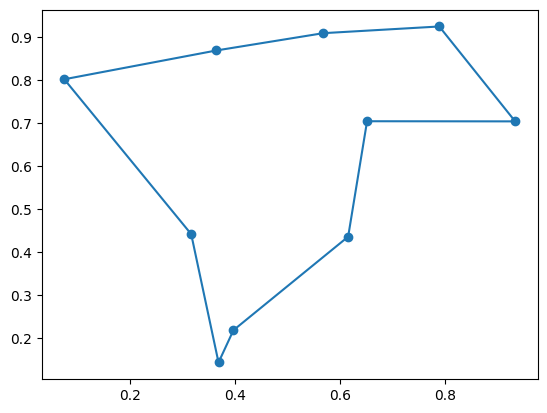

In [ ]:
# Code goes here
def simulated_annealing(tsp, initial_tour=None, T0=None, alpha=0.999, max_steps=50000, verbose=True):
    n = len(tsp['pos'])

    if initial_tour is None:
        current_tour = random_tour(n)
    else:
        current_tour = initial_tour.copy()

    current_length = tour_length(tsp, current_tour)
    best_tour = current_tour
    best_length = current_length

    history = [current_length]

    # Nhiệt độ ban đầu có thể ước tính dựa trên độ chênh lệch lớn nhất
    if T0 is None:
        T0 = np.max(tsp["dist"]) * n / 5 # Heuristic đơn giản

    T = T0

    if verbose:
        print(f"Initial tour length: {current_length:.2f}, Initial Temp: {T0:.2f}")

    for step in range(max_steps):
        T *= alpha # Lịch trình làm nguội

        if T < 1e-8: # Dừng khi nhiệt độ quá thấp
            break

        # Tạo một hàng xóm ngẫu nhiên
        new_tour = move_swap(current_tour)
        new_length = tour_length(tsp, new_tour)

        deltaE = new_length - current_length

        # Chấp nhận nếu tốt hơn hoặc theo xác suất
        if deltaE < 0 or random.random() < math.exp(-deltaE / T):
            current_tour = new_tour
            current_length = new_length

            if current_length < best_length:
                best_tour = current_tour
                best_length = current_length
                if verbose:
                    print(f"Step {step}: New best length: {best_length:.2f}")

        history.append(best_length)

    return best_tour, history

# Chạy thử
best_tour_sa, history_sa = simulated_annealing(tsp_10, initial_tour_10)
show_tsp(tsp_10, best_tour_sa)

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [ ]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.1633167266845703 milliseconds



--- Bắt đầu so sánh cho 10 thành phố ---
Hoàn thành Steepest-Ascent HC - Độ dài: 2.74, Thời gian: 0.0010s
Hoàn thành Random-Restart HC - Độ dài: 2.74, Thời gian: 0.0103s
Hoàn thành First-Choice HC - Độ dài: 2.99, Thời gian: 0.0010s
Hoàn thành Stochastic HC - Độ dài: 2.81, Thời gian: 0.0019s
Hoàn thành Simulated Annealing - Độ dài: 2.74, Thời gian: 0.1095s
Hoàn thành Genetic Algorithm - Độ dài: 2.74, Thời gian: 0.3515s

--- Bắt đầu so sánh cho 30 thành phố ---
Hoàn thành Steepest-Ascent HC - Độ dài: 6.61, Thời gian: 0.0977s
Hoàn thành Random-Restart HC - Độ dài: 6.19, Thời gian: 0.8206s
Hoàn thành First-Choice HC - Độ dài: 7.02, Thời gian: 0.0068s
Hoàn thành Stochastic HC - Độ dài: 5.51, Thời gian: 0.1825s
Hoàn thành Simulated Annealing - Độ dài: 5.78, Thời gian: 0.2130s
Hoàn thành Genetic Algorithm - Độ dài: 11.34, Thời gian: 0.7197s

--- Bắt đầu so sánh cho 50 thành phố ---
Hoàn thành Steepest-Ascent HC - Độ dài: 8.39, Thời gian: 0.6382s
Hoàn thành Random-Restart HC - Độ dài: 7.13, T

,Algorithm,Cities,Tour Length,Runtime (s)
0,Steepest-Ascent HC,10,2.74,9.77e-04
1,Random-Restart HC,10,2.74,1.03e-02
2,First-Choice HC,10,2.99,9.90e-04
3,Stochastic HC,10,2.81,1.94e-03
4,Simulated Annealing,10,2.74,1.10e-01
5,Genetic Algorithm,10,2.74,3.52e-01
6,Steepest-Ascent HC,30,6.61,9.77e-02
7,Random-Restart HC,30,6.19,8.21e-01
8,First-Choice HC,30,7.02,6.75e-03
9,Stochastic HC,30,5.51,1.82e-01


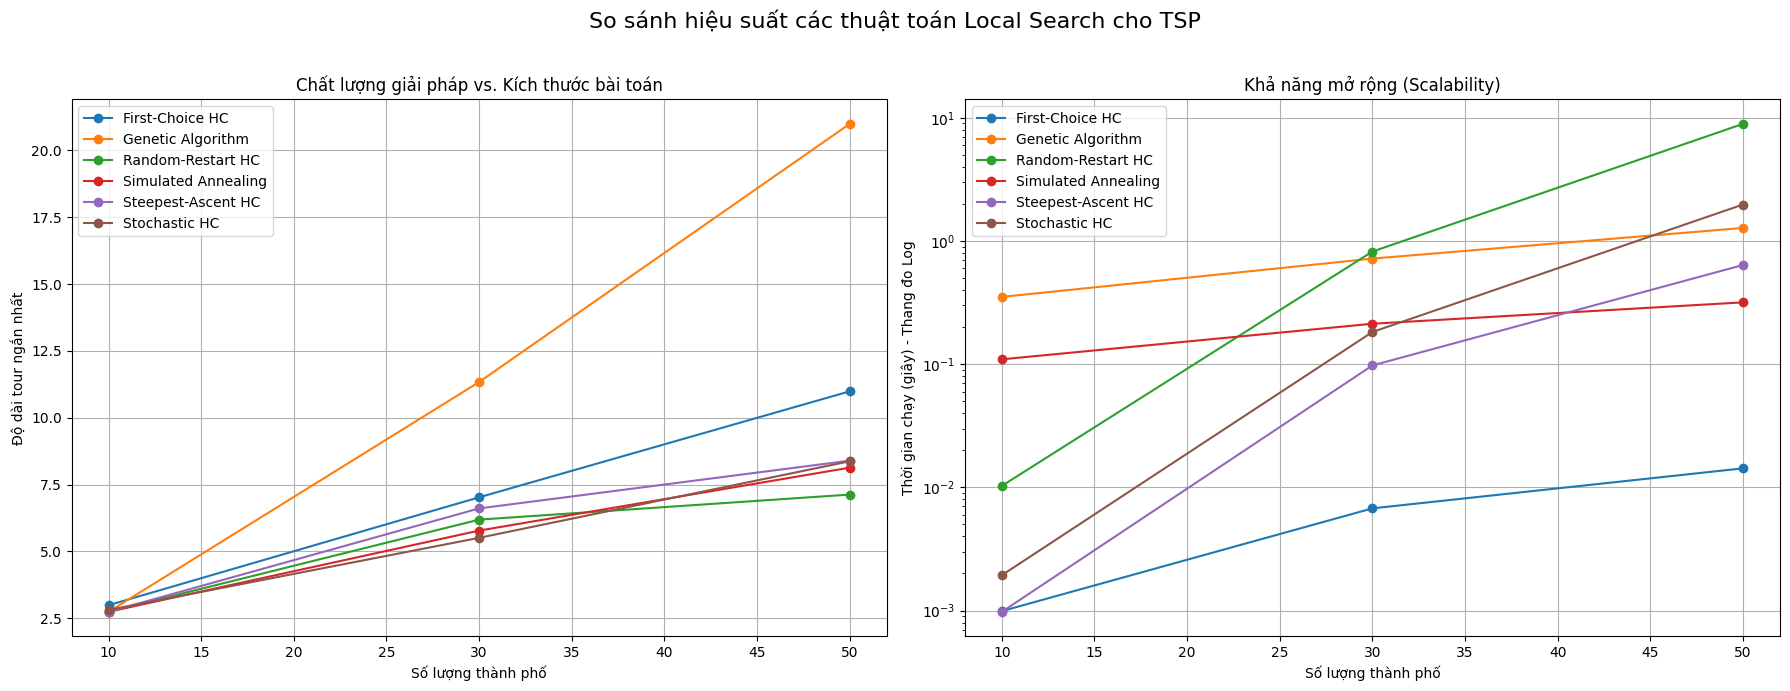

In [ ]:
# Code and results go here
import time
import pandas as pd
import matplotlib.pyplot as plt

def compare_algorithms(city_counts, restarts=10, max_steps=1000):
    """
    Chạy tất cả các thuật toán trên các bộ dữ liệu TSP có kích thước khác nhau
    và trả về kết quả dưới dạng DataFrame.
    """
    results_list = []

    # Định nghĩa các thuật toán cần so sánh
    algorithms = {
        "Steepest-Ascent HC": steepest_ascend_hill_climbing,
        "Random-Restart HC": lambda tsp, tour: random_restart_hill_climbing(tsp, k=restarts, max_steps=max_steps, verbose=False),
        "First-Choice HC": first_choice_hill_climbing,
        "Stochastic HC": stochastic_hill_climbing,
        "Simulated Annealing": simulated_annealing,
        # "Genetic Algorithm": genetic_algorithm
    }

    for n in city_counts:
        print(f"\n--- Bắt đầu so sánh cho {n} thành phố ---")
        # Tạo một bài toán TSP duy nhất cho mỗi kích thước để so sánh công bằng
        tsp = random_tsp(n)
        initial_tour = random_tour(n)

        for name, algorithm in algorithms.items():
            start_time = time.time()

            # Xử lý các hàm có tham số khác nhau
            if "Restart" in name:
                 best_tour = algorithm(tsp, initial_tour)
            elif "Genetic" in name:
                 best_tour, _ = algorithm(tsp, verbose=False)
            else:
                 best_tour, _ = algorithm(tsp, initial_tour, verbose=False)

            runtime = time.time() - start_time
            best_length = tour_length(tsp, best_tour)

            results_list.append({
                "Algorithm": name,
                "Cities": n,
                "Tour Length": best_length,
                "Runtime (s)": runtime
            })
            print(f"Hoàn thành {name} - Độ dài: {best_length:.2f}, Thời gian: {runtime:.4f}s")

    return pd.DataFrame(results_list)

# Xác định số lượng thành phố để kiểm tra
city_counts_to_test = [10, 30, 50]
results_df = compare_algorithms(city_counts_to_test)

print("\n--- Bảng tổng hợp kết quả ---")
display(results_df)

# --- Vẽ biểu đồ ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('So sánh hiệu suất các thuật toán Local Search cho TSP', fontsize=16)

# Biểu đồ 1: Chất lượng giải pháp (Tour Length)
for name, group in results_df.groupby('Algorithm'):
    ax1.plot(group['Cities'], group['Tour Length'], marker='o', linestyle='-', label=name)
ax1.set_xlabel('Số lượng thành phố')
ax1.set_ylabel('Độ dài tour ngắn nhất')
ax1.set_title('Chất lượng giải pháp vs. Kích thước bài toán')
ax1.legend()
ax1.grid(True)

# Biểu đồ 2: Thời gian chạy (Runtime)
for name, group in results_df.groupby('Algorithm'):
    ax2.plot(group['Cities'], group['Runtime (s)'], marker='o', linestyle='-', label=name)
ax2.set_xlabel('Số lượng thành phố')
ax2.set_ylabel('Thời gian chạy (giây) - Thang đo Log')
ax2.set_title('Khả năng mở rộng (Scalability)')
ax2.set_yscale('log') # Dùng thang đo log vì thời gian chạy chênh lệch lớn
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Bonus: Genetic Algorithm [+1 Point]

Generation 0: New best length: 3.49
Generation 4: New best length: 3.38
Generation 10: New best length: 3.11
Generation 21: New best length: 3.04
Generation 87: New best length: 2.67
Tour length: 2.67


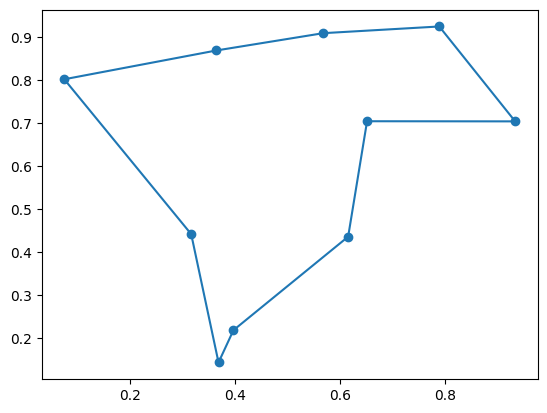

In [ ]:
# Code goes here

# --- Các hàm trợ giúp cho Genetic Algorithm ---

def ordered_crossover(parent1, parent2):
    """Lai ghép có thứ tự (Ordered Crossover - OX1)"""
    size = len(parent1)
    child = [None] * size

    # Chọn ngẫu nhiên một đoạn từ parent1
    start, end = sorted(random.sample(range(size), 2))

    # Sao chép đoạn đó vào child
    child[start:end+1] = parent1[start:end+1]

    # Lấy các thành phố từ parent2 để điền vào các chỗ còn trống
    pointer = 0
    for i in range(size):
        if child[i] is None:
            while parent2[pointer] in child:
                pointer += 1
            child[i] = parent2[pointer]
            pointer += 1

    return child

def swap_mutation(tour):
    """Đột biến bằng cách hoán đổi 2 thành phố."""
    return move_swap(tour)

def genetic_algorithm(tsp, population_size=50, generations=500, mutation_rate=0.01, verbose=True):
    n = len(tsp['pos'])

    # 1. Khởi tạo quần thể
    population = [random_tour(n) for _ in range(population_size)]

    best_tour = None
    best_length = float('inf')
    history = []

    for gen in range(generations):
        # 2. Đánh giá (Tính fitness)
        # Fitness là nghịch đảo của độ dài tour, tour càng ngắn fitness càng cao
        fitness_scores = [1 / tour_length(tsp, tour) for tour in population]

        # Tìm giải pháp tốt nhất trong thế hệ hiện tại
        current_best_length = 1 / max(fitness_scores)
        if current_best_length < best_length:
            best_length = current_best_length
            best_tour = population[np.argmax(fitness_scores)]
            if verbose:
                print(f"Generation {gen}: New best length: {best_length:.2f}")

        history.append(best_length)

        # 3. Chọn lọc (Selection) - Roulette Wheel
        total_fitness = sum(fitness_scores)
        selection_probs = [f / total_fitness for f in fitness_scores]

        new_population = []
        for _ in range(population_size):
            # 4. Lai ghép (Crossover)
            parent1, parent2 = random.choices(population, weights=selection_probs, k=2)
            child = ordered_crossover(parent1, parent2)

            # 5. Đột biến (Mutation)
            if random.random() < mutation_rate:
                child = swap_mutation(child)

            new_population.append(child)

        population = new_population

    return best_tour, history

# Chạy thử
best_tour_ga, history_ga = genetic_algorithm(tsp_10)
show_tsp(tsp_10, best_tour_ga)